In [80]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

In [81]:
plt.style.use('default')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:20,.2f}'.format

In [82]:
df = pd.read_csv('train.csv', encoding= 'utf-8')
df.head(5)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,...,"23,533.00",nan,nan,2015-08-23 00:00:00,0.00,0.00,0.00,0.00,0.00,"2,273,000.00"
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,...,"24,514.00",19.31,-99.23,2013-06-28 00:00:00,0.00,0.00,0.00,1.00,1.00,"3,600,000.00"
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,...,"48,551.00",nan,nan,2015-10-17 00:00:00,0.00,0.00,0.00,0.00,0.00,"1,200,000.00"
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,...,"53,666.00",19.30,-99.69,2012-03-09 00:00:00,0.00,0.00,0.00,1.00,1.00,"650,000.00"
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,...,"47,835.00",nan,nan,2016-06-07 00:00:00,0.00,0.00,0.00,0.00,0.00,"1,150,000.00"


# Verificacion de datos

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [84]:
df.shape

(240000, 23)

In [85]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [86]:
df.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,"240,000.00","196,445.00","217,529.00","202,235.00","213,779.00","222,600.00","188,533.00","211,379.00","116,512.00","116,512.00","240,000.00","240,000.00","240,000.00","240,000.00","240,000.00","240,000.00"
mean,"149,969.38",8.12,2.90,1.55,2.13,174.02,176.77,"2,423,467.82",20.70,-99.51,0.06,0.06,0.09,0.44,0.40,"2,530,838.35"
std,"86,634.58",9.55,0.90,0.85,0.91,98.15,94.43,"10,567,938.36",3.14,9.74,0.24,0.23,0.28,0.50,0.49,"2,152,551.80"
min,1.00,0.00,1.00,0.00,1.00,15.00,15.00,22.00,-100.89,-125.86,0.00,0.00,0.00,0.00,0.00,"310,000.00"
25%,"74,930.75",0.00,2.00,1.00,1.00,90.00,102.00,"24,890.00",19.36,-100.98,0.00,0.00,0.00,0.00,0.00,"952,772.50"
50%,"149,875.50",5.00,3.00,2.00,2.00,153.00,155.00,"56,383.00",19.54,-99.24,0.00,0.00,0.00,0.00,0.00,"1,850,000.00"
75%,"225,016.50",10.00,3.00,2.00,3.00,240.00,238.00,"87,838.00",20.74,-99.13,0.00,0.00,0.00,1.00,1.00,"3,390,000.00"
max,"299,999.00",80.00,10.00,3.00,4.00,439.00,439.00,"50,003,999.00",83.03,121.04,1.00,1.00,1.00,1.00,1.00,"12,525,000.00"


### Evaluo la posibilidad de reemplazar los valores nulos de garages por 0

In [87]:
df['garages'].value_counts(dropna=False)

2.00    94167
1.00    59464
 nan    37765
0.00    26926
3.00    21678
Name: garages, dtype: int64

La idea de que haya mas propiedades con uno y dos garages que propiedades sin garages resulta extrania.
Asique creo que es seguro reemplazar los NaNs por 0

### Evaluo la posibilidad de reemplazar los valores nulos de antiguedad por 0, o de eliminar las filas que tengan nulos

In [88]:
df['antiguedad'].value_counts(dropna=False)

 0.00    50335
  nan    43555
 5.00    33268
10.00    28844
20.00    19904
         ...  
68.00        2
79.00        2
64.00        1
71.00        1
77.00        1
Name: antiguedad, Length: 79, dtype: int64

In [89]:
# Veo si hay una relacion de los nulos de antiguedad y los nulos de las demas columnas
dfAntigNulas = df[df['antiguedad'].isnull()]
dfAntigNulas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43555 entries, 0 to 239983
Data columns (total 23 columns):
id                            43555 non-null int64
titulo                        42846 non-null object
descripcion                   43299 non-null object
tipodepropiedad               43519 non-null object
direccion                     16454 non-null object
ciudad                        43351 non-null object
provincia                     43451 non-null object
antiguedad                    0 non-null float64
habitaciones                  34160 non-null float64
garages                       31949 non-null float64
banos                         33528 non-null float64
metroscubiertos               37543 non-null float64
metrostotales                 34200 non-null float64
idzona                        32038 non-null float64
lat                           19856 non-null float64
lng                           19856 non-null float64
fecha                         43555 non-null object
gi

Llego a la conclucion que no vale la pena cambiar ni eliminar las filas que contengan 
antiguedad nula, ya que pierdo una gran cantidad de datos, ni tiene sentido reemplazar
los nulos por 0, porque como ya existe el caso de antiguedad = 0, no necesariamente si 
es nulo entonces es 0 y a diferencia de Garages hay mas variedad de posibles valores. 
Me parece mas seguro que al momento de evaluar algo que tenga que ver con la antiguedad
solo tenga en cuenta los valores no nulos

In [90]:
df['ciudad'].unique().size

876

In [91]:
df['provincia'].unique().size

33

In [92]:
df['habitaciones'] = df['habitaciones'].fillna(0)
df['garages'] = df['garages'].fillna(0)
df['banos'] = df['banos'].fillna(0)
df['idzona'] = df['idzona'].fillna(0)

In [93]:
df = df.astype({'tipodepropiedad': 'category',\
                'id': 'uint32',\
                'gimnasio': 'bool_',\
                'usosmultiples': 'bool_',\
                'piscina': 'bool_',\
                'escuelascercanas': 'bool_',\
                'centroscomercialescercanos': 'bool_',\
                'garages': 'uint8',\
                'banos': 'uint8',\
                'habitaciones': 'uint8',\
                'precio': 'uint32',\
                'ciudad': 'category',\
                'provincia': 'category',\
                'idzona': 'uint32'})

In [94]:
(df.memory_usage() / (1024 * 1024 )).sum()

22.020774841308594

## Cual es la frecuencia de los metros totales y los cubiertos?

Text(0, 0.5, 'Frecuencia')

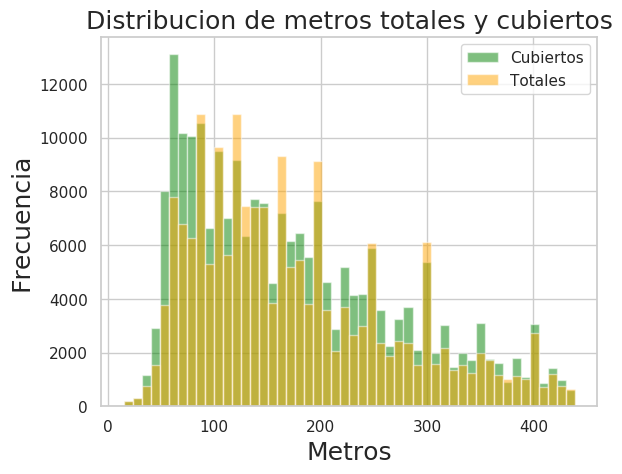

In [95]:
b = df[["metroscubiertos","metrostotales"]].plot.hist(bins=50, alpha=0.5, color= ['green','orange'])
b.legend(["Cubiertos", "Totales"]);
b.set_title("Distribucion de metros totales y cubiertos", fontsize=18)
b.set_xlabel("Metros",fontsize=18)
b.set_ylabel("Frecuencia", fontsize=18)

## Cual es el promedio de cantidad de banos y garagen por cantidad de habitaciones?

In [96]:
prueba = df.groupby('habitaciones').agg({'garages':'mean', 'banos':'mean'})
prueba

,garages,banos
habitaciones,,
0,0.22,0.42
1,0.83,1.11
2,1.17,1.44
3,1.56,2.27
4,1.46,2.57
5,1.26,2.26
6,1.10,2.16
7,1.02,1.99
8,0.89,1.83


Text(0.5, 1.0, 'Promedio de la cantidad de banos y garages por cantidad de habitaciones')

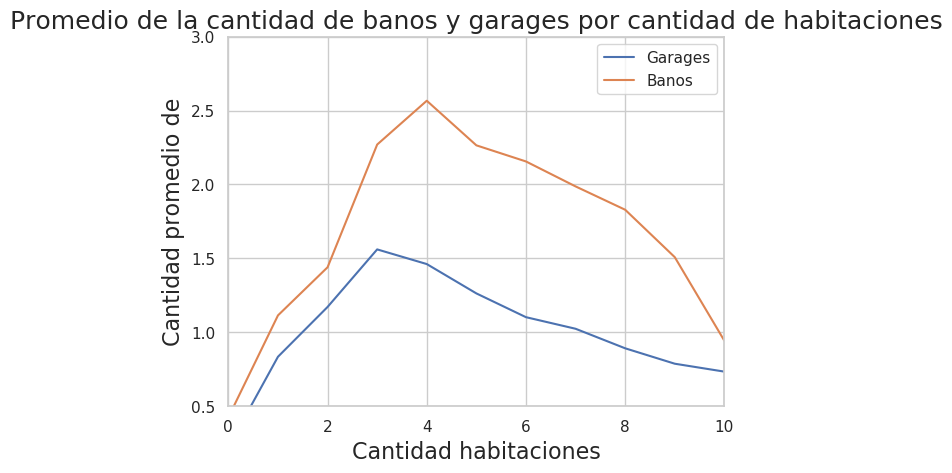

In [97]:
e = prueba[['garages','banos']].plot(ylim=(0.5, 3.0))
e.legend(["Garages", "Banos"]);
e.set_ylabel('Cantidad promedio de',fontsize=16);
e.set_xlabel('Cantidad habitaciones',fontsize=16);
e.set_title("Promedio de la cantidad de banos y garages por cantidad de habitaciones", fontsize=18)

## Cual es la cantidad de habitaciones promedio por tipo de propiedad?

In [98]:
prueba = df.groupby('tipodepropiedad').agg({'habitaciones':'mean'})
prueba.sort_values('habitaciones', inplace=True)

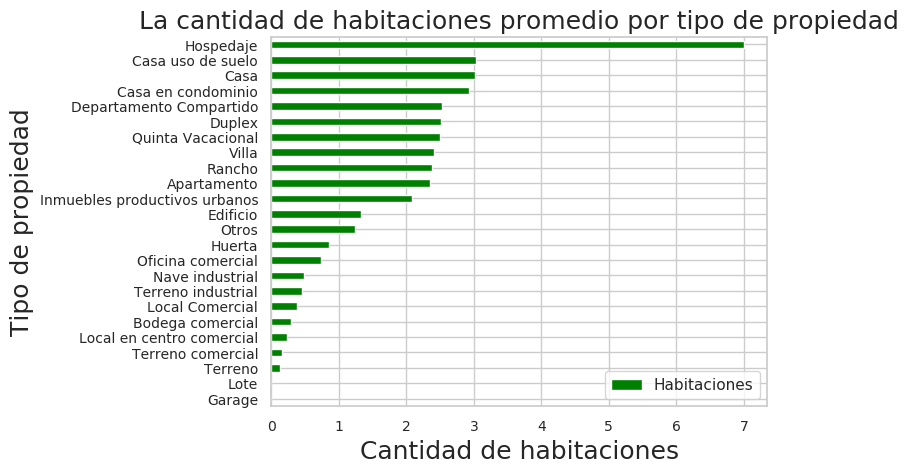

In [99]:
b = prueba.plot(kind='barh', fontsize=10, color= 'green') 
b.legend(['Habitaciones'])
b.set_title('La cantidad de habitaciones promedio por tipo de propiedad', fontsize=18);
b.set_xlabel('Cantidad de habitaciones', fontsize=18);
b.set_ylabel('Tipo de propiedad', fontsize=18);

## PROPIEDADES CON TODO

### Las propiedades con "todo" seran aquellas que tengan todo lo que se pueda tener (todas las columnas del tipo bool seran true)

In [100]:
#Creo un data frame que tenga todas las "cosas" que se puedan tener 
PropiedadesConTodo = df[(df['gimnasio']==True) & (df['usosmultiples']==True) &\
                      (df['piscina']==True) & (df['escuelascercanas']==True) &\
                      (df['centroscomercialescercanos']==True)]

PropiedadesConTodo.shape

(3535, 23)

## Cual es la frecuencia de la cantidad de habitaciones en propiedades con todo

In [101]:
PropiedadesConTodo['habitaciones'].value_counts()

3    2056
2    1016
4     239
1     179
0      24
5      18
6       2
7       1
Name: habitaciones, dtype: int64

In [102]:
Orden = list(range(8))

Text(0.5, 1.0, 'Frecuencia de la cantidad de habitaciones en propiedades con todo')

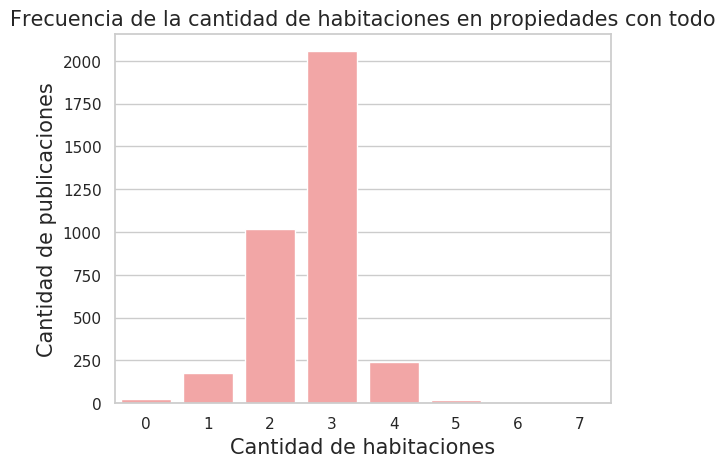

In [103]:
g = sns.countplot(x='habitaciones', data=PropiedadesConTodo, order=Orden, color= '#ff9999')
g.set_xlabel("Cantidad de habitaciones", fontsize=15)
g.set_ylabel("Cantidad de publicaciones", fontsize=15)
g.set_title("Frecuencia de la cantidad de habitaciones en propiedades con todo", fontsize=15)

## Cual es el promedio de banos y garages en propiedades con todo?

In [104]:
grupo_PropiedadesConTodo = PropiedadesConTodo.groupby('habitaciones').agg({'garages':'mean', 'banos':'mean'})
grupo_PropiedadesConTodo

,garages,banos
habitaciones,,
0,0.67,1.00
1,1.24,1.13
2,1.83,2.00
3,2.04,2.70
4,1.76,2.79
5,1.67,2.00
6,0.00,0.00
7,0.00,4.00


In [105]:
#Ya que solo hay una propiedad que tiene 7 habitaciones, la elimino
#para una mejor interpretacion de los datos en los graficos
grupo_PropiedadesConTodo = grupo_PropiedadesConTodo.loc[:6]

Text(0.5, 1.0, 'Promedio de la cantidad de banos y garages por cantidad de habitaciones en propiedades con todo')

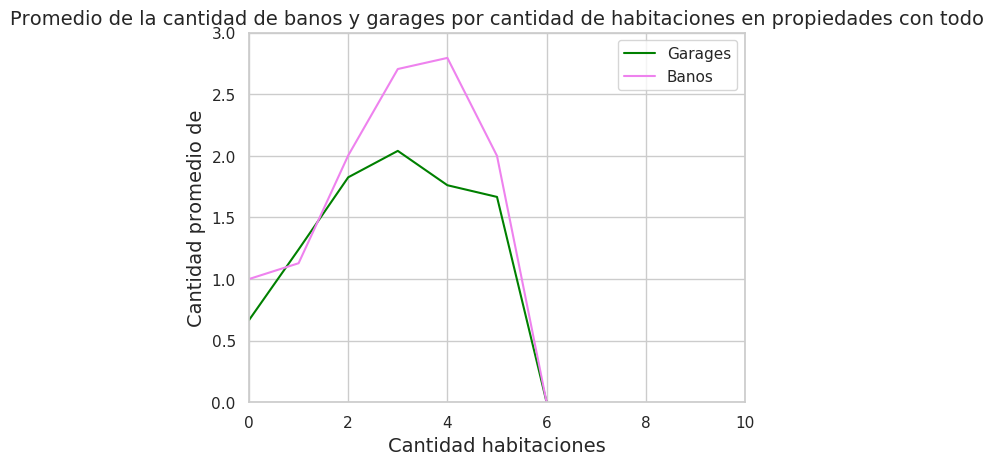

In [106]:
e = grupo_PropiedadesConTodo[['garages','banos']].plot(ylim=(0.0, 3.0), xlim=(0.0, 10.0), color= ['green','violet'])
e.legend(['Garages','Banos'])
e.set_ylabel('Cantidad promedio de',fontsize=14);
e.set_xlabel('Cantidad habitaciones',fontsize=14);
e.set_title("Promedio de la cantidad de banos y garages por cantidad de habitaciones en propiedades con todo", fontsize=14)

## Cual es la frecuencia de metros cubiertos y todales en propiedades con todo?

Text(0, 0.5, 'Frecuencia')

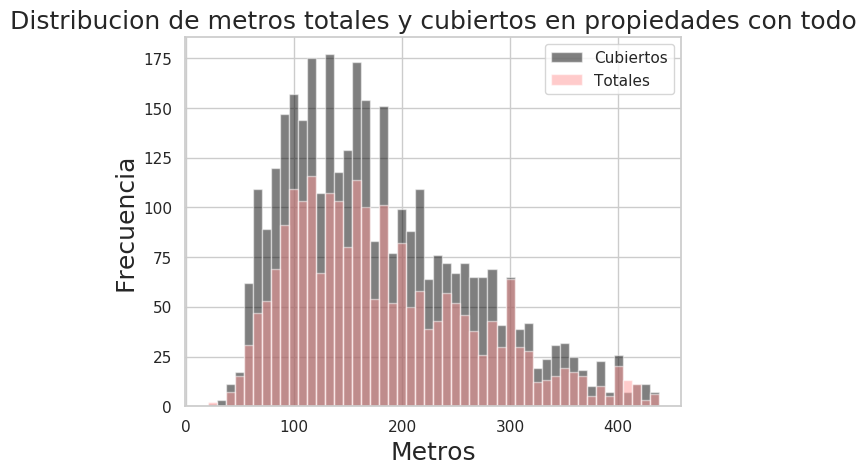

In [107]:
b = PropiedadesConTodo[["metroscubiertos","metrostotales"]].plot.hist(bins=50, alpha=0.5, color= ['black','#ff9999'])
b.legend(['Cubiertos','Totales'])
b.set_title("Distribucion de metros totales y cubiertos en propiedades con todo", fontsize=18)
b.set_xlabel("Metros",fontsize=18)
b.set_ylabel("Frecuencia", fontsize=18)

In [108]:
PropiedadesConTodo['tipodepropiedad'].value_counts()

Apartamento                      2622
Casa                              569
Casa en condominio                333
Departamento Compartido            10
Oficina comercial                   1
Huerta                              0
Bodega comercial                    0
Casa uso de suelo                   0
Duplex                              0
Edificio                            0
Garage                              0
Hospedaje                           0
Villa                               0
Terreno industrial                  0
Local Comercial                     0
Local en centro comercial           0
Lote                                0
Nave industrial                     0
Otros                               0
Quinta Vacacional                   0
Rancho                              0
Terreno                             0
Terreno comercial                   0
Inmuebles productivos urbanos       0
Name: tipodepropiedad, dtype: int64

In [223]:
sTop3 = PropiedadesConTodo['tipodepropiedad'].value_counts().nlargest(3)

In [252]:
red_palette = ['#ff4d4d', '#ff6666', '#ff9999', '#ffe6e6']
explo = (0,0.05,0.1)

Text(0, 0.5, '')

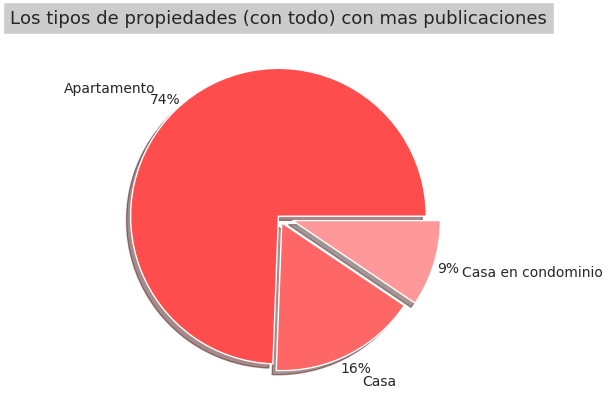

In [254]:
p = sTop3.plot.pie(fontsize=10, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,\
                         shadow=True, startangle=0, colors= red_palette, explode= explo)
plt.title("Los tipos de propiedades (con todo) con mas publicaciones", fontsize=13, bbox={'facecolor':'0.8', 'pad':5})
p.set_ylabel('')

En conclusion la mayoria de propiedades "con todo" son apartamentos

In [111]:
Orden = PropiedadesConTodo['antiguedad'].value_counts()

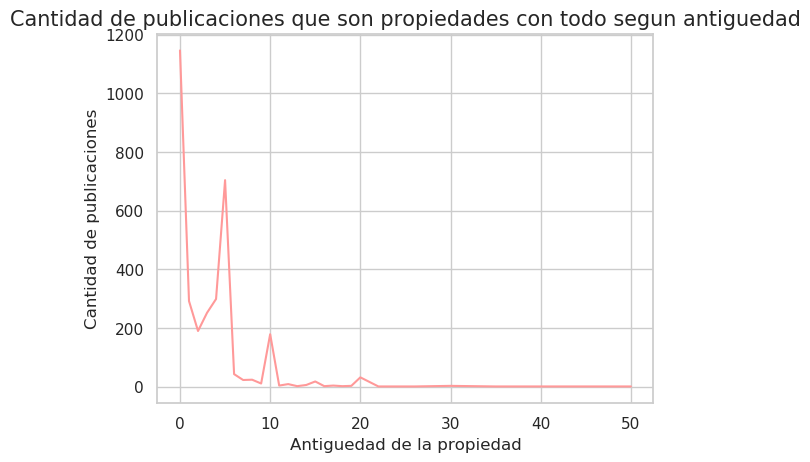

In [112]:
g = sns.lineplot(y=Orden, x=Orden.index, color= '#ff9999');
g.set_title('Cantidad de publicaciones que son propiedades con todo segun antiguedad', fontsize=15);
g.set_xlabel('Antiguedad de la propiedad');
g.set_ylabel('Cantidad de publicaciones');

In [113]:
sTop15 = PropiedadesConTodo['ciudad'].value_counts().nlargest(15)

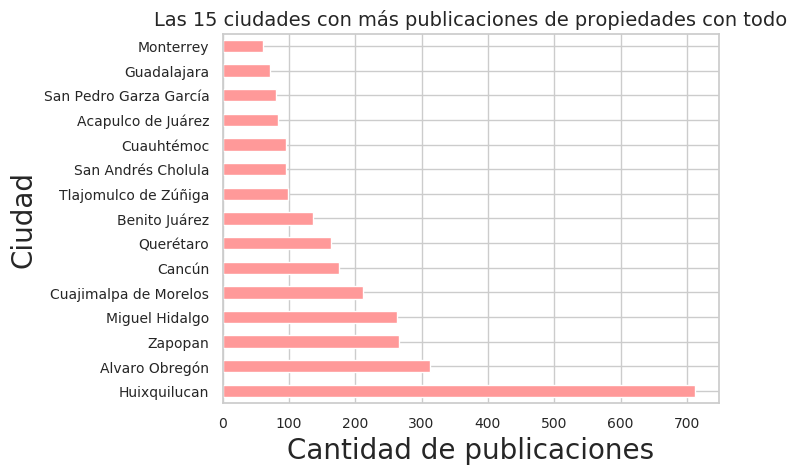

In [114]:
b = sTop15.plot(kind='barh', fontsize=10, color= '#ff9999')
b.set_title('Las 15 ciudades con más publicaciones de propiedades con todo', fontsize=14);
b.set_xlabel('Cantidad de publicaciones', fontsize=20);
b.set_ylabel('Ciudad', fontsize=20);

In [115]:
sTop15 = PropiedadesConTodo['provincia'].value_counts().nlargest(15)

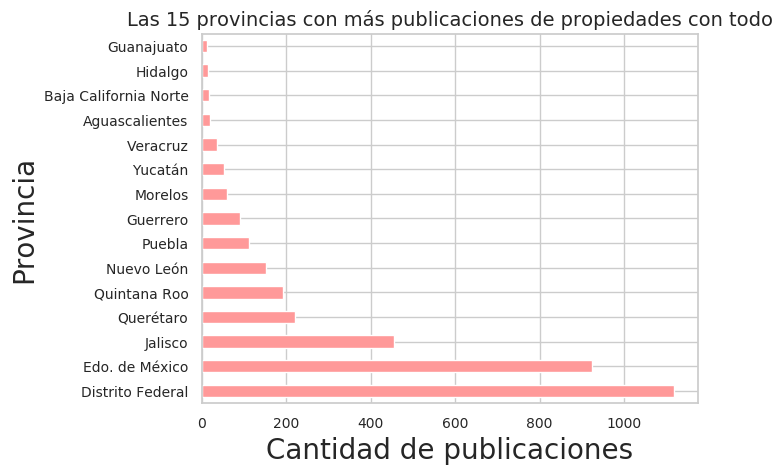

In [116]:
b = sTop15.plot(kind='barh', fontsize=10, color= '#ff9999')#color= plt.cm.Paired(np.arange(len(sTop15))))
b.set_title('Las 15 provincias con más publicaciones de propiedades con todo', fontsize=14);
b.set_xlabel('Cantidad de publicaciones', fontsize=20);
b.set_ylabel('Provincia', fontsize=20);

## **PROPIEDADES SIN NADA**

In [117]:
PropiedadesSinNada = df[(df['gimnasio']==False) & (df['usosmultiples']==False) &\
                      (df['piscina']==False) & (df['escuelascercanas']==False) &\
                      (df['centroscomercialescercanos']==False)]

PropiedadesSinNada.shape

(120652, 23)

## Cual es la frecuencia de la cantidad de habitaciones en propiedades sin nada?

In [118]:
PropiedadesSinNada['habitaciones'].value_counts()

3     58496
2     28081
0     15940
4     11746
1      2675
5      2192
6       840
7       269
8       196
10      127
9        90
Name: habitaciones, dtype: int64

In [119]:
Orden = list(range(8))

Text(0.5, 1.0, 'Frecuencia de la cantidad de habitaciones en propiedades sin nada')

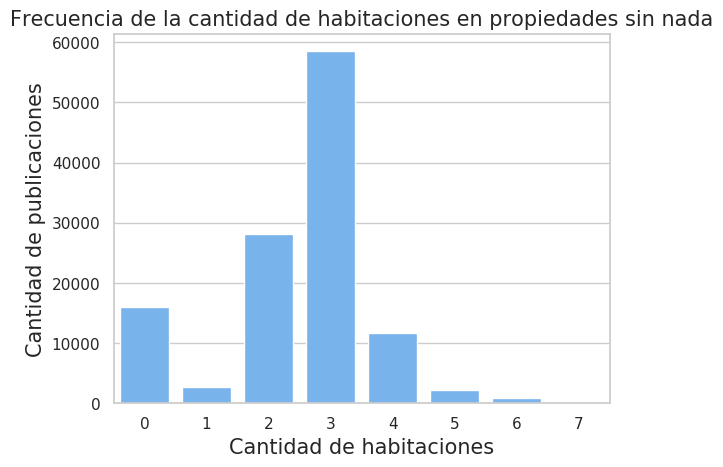

In [120]:
g = sns.countplot(x='habitaciones', data=PropiedadesSinNada, order=Orden, color= '#66b3ff')
g.set_xlabel("Cantidad de habitaciones", fontsize=15)
g.set_ylabel("Cantidad de publicaciones", fontsize=15)
g.set_title("Frecuencia de la cantidad de habitaciones en propiedades sin nada", fontsize=15)

## Cual es el promedio de la cantidad de banos y garages por cantidad de habitaciones en propiedades sin nada?

In [121]:
#Al crear el data frame omito las propiedades que tienen 6 y 7 habitaciones ya que solo 3 propiedades tienen esa cantidad
grupo_PropiedadesSinNada = PropiedadesSinNada.groupby('habitaciones').agg({'garages':'mean', 'banos':'mean'})#.loc[:10]
grupo_PropiedadesSinNada

,garages,banos
habitaciones,,
0,0.23,0.44
1,0.73,1.14
2,1.09,1.44
3,1.47,2.27
4,1.38,2.52
5,1.21,2.26
6,1.05,2.12
7,0.91,2.05
8,0.77,1.70


Text(0.5, 1.0, 'Promedio de la cantidad de banos y garages por cantidad de habitaciones en propiedades sin nada')

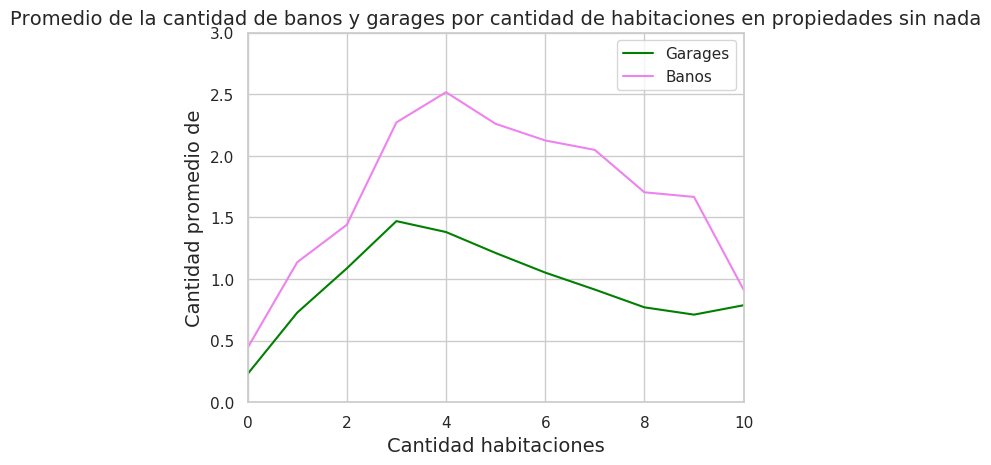

In [122]:
e = grupo_PropiedadesSinNada[['garages','banos']].plot(ylim=(0.0, 3.0), xlim=(0.0, 10.0), color= ['green','violet'])
e.legend(['Garages','Banos'])
e.set_ylabel('Cantidad promedio de',fontsize=14);
e.set_xlabel('Cantidad habitaciones',fontsize=14);
e.set_title("Promedio de la cantidad de banos y garages por cantidad de habitaciones en propiedades sin nada", fontsize=14)

## Cual es la distribucion de metros totales y cubiertos en propiedades sin nada?

Text(0, 0.5, 'Frecuencia')

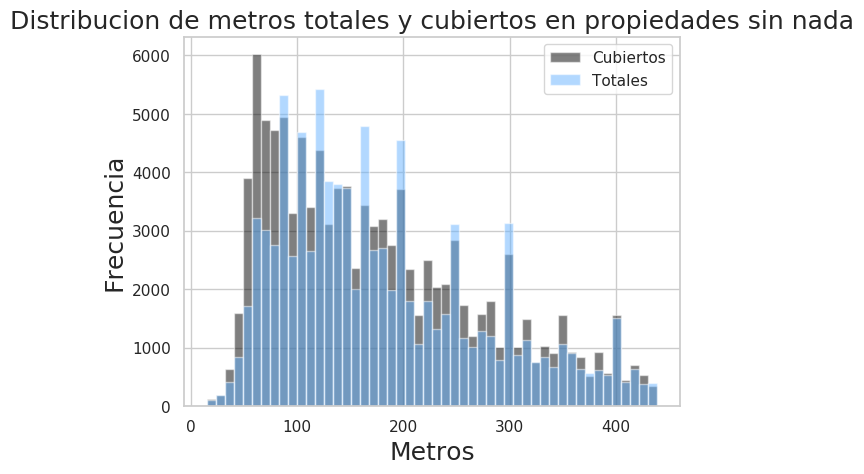

In [123]:
b = PropiedadesSinNada[["metroscubiertos","metrostotales"]].plot.hist(bins=50, alpha=0.5, color= ['black','#66b3ff'])
b.legend(['Cubiertos','Totales'])
b.set_title("Distribucion de metros totales y cubiertos en propiedades sin nada", fontsize=18)
b.set_xlabel("Metros",fontsize=18)
b.set_ylabel("Frecuencia", fontsize=18)

## Cuales son los tipos de propiedades con mas publicaciones en propiedades sin nada?

In [228]:
PropiedadesSinNada['tipodepropiedad'].value_counts()

Casa                             71525
Apartamento                      26303
Casa en condominio                8330
Terreno                           6069
Local Comercial                   2204
Oficina comercial                 1212
Bodega comercial                  1136
Terreno comercial                 1103
Edificio                           907
Casa uso de suelo                  451
Duplex                             339
Quinta Vacacional                  249
Villa                              170
Rancho                             141
Otros                              134
Inmuebles productivos urbanos       96
Nave industrial                     76
Local en centro comercial           73
Departamento Compartido             34
Terreno industrial                  31
Huerta                              17
Lote                                 5
Hospedaje                            1
Garage                               1
Name: tipodepropiedad, dtype: int64

In [236]:
blue_palette = ['#009ACD', '#0EBFE9','cyan', '#63D1F4', '#ADD8E6', '#C1F0F6']

In [237]:
sTop6 = PropiedadesSinNada['tipodepropiedad'].value_counts().nlargest(6)

In [250]:
explo = (0,0.02,0.1,0.15,0.20,0.25)

Text(0, 0.5, '')

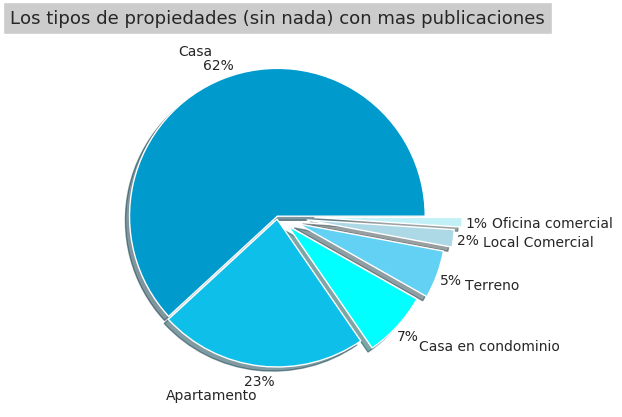

In [251]:
p = sTop6.plot.pie(fontsize=10, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,\
                         shadow=True, startangle=0, colors= blue_palette, explode= explo)
plt.title("Los tipos de propiedades (sin nada) con mas publicaciones", fontsize=13, bbox={'facecolor':'0.8', 'pad':5})
p.set_ylabel('')

## Cual es la cantidad de publicaciones que son propiedades sin nada segun antiguedad?

In [127]:
Orden = PropiedadesSinNada['antiguedad'].value_counts().sort_index().loc[:50]

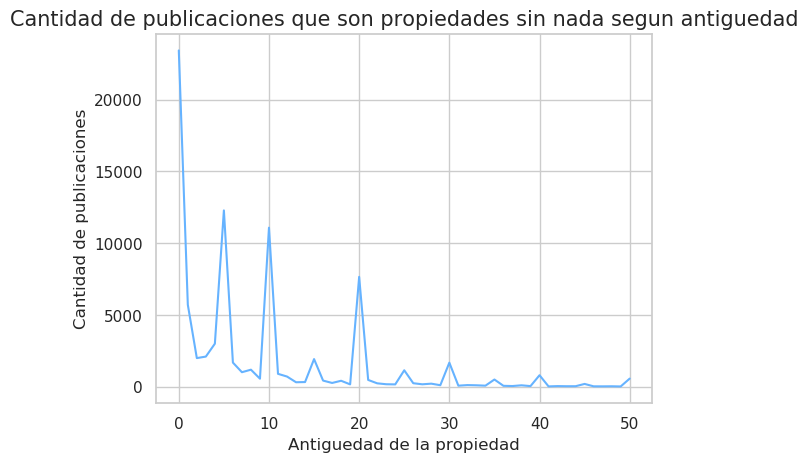

In [128]:
g = sns.lineplot(y=Orden, x=Orden.index, color= '#66b3ff');
g.set_title('Cantidad de publicaciones que son propiedades sin nada segun antiguedad', fontsize=15);
g.set_xlabel('Antiguedad de la propiedad');
g.set_ylabel('Cantidad de publicaciones');

## Cuales son las 15 ciudades con más publicaciones de propiedades sin nada?

In [129]:
PropiedadesSinNada['ciudad'].value_counts().nlargest(15)

San Luis Potosí         6502
Querétaro               6221
Benito Juárez           5120
Zapopan                 4740
Monterrey               4562
Mérida                  3730
Cuauhtémoc              3373
Alvaro Obregón          2980
Miguel Hidalgo          2747
Chihuahua               2600
Tlalpan                 2536
Huixquilucan            2461
Naucalpan de Juárez     2450
Coyoacán                2361
Atizapán de Zaragoza    2342
Name: ciudad, dtype: int64

In [130]:
sTop15 = PropiedadesSinNada['ciudad'].value_counts().nlargest(15)

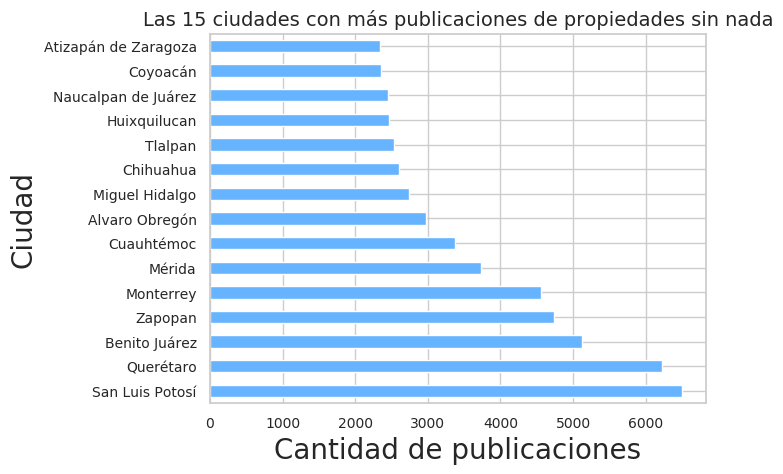

In [131]:
b = sTop15.plot(kind='barh', fontsize=10, color= '#66b3ff')
b.set_title('Las 15 ciudades con más publicaciones de propiedades sin nada', fontsize=14);
b.set_xlabel('Cantidad de publicaciones', fontsize=20);
b.set_ylabel('Ciudad', fontsize=20);

## Cuales son las 15 provincias con más publicaciones de propiedades sin nada?

In [132]:
sTop15 = PropiedadesSinNada['provincia'].value_counts().nlargest(15)

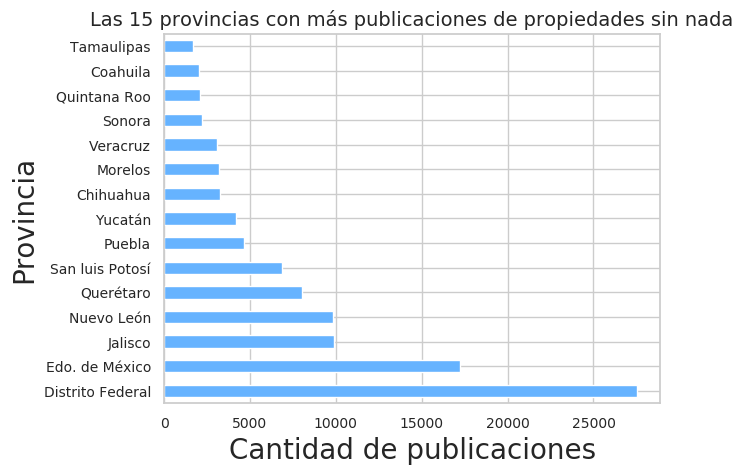

In [133]:
b = sTop15.plot(kind='barh', fontsize=10, color= '#66b3ff')#color= plt.cm.Paired(np.arange(len(sTop15))))
b.set_title('Las 15 provincias con más publicaciones de propiedades sin nada', fontsize=14);
b.set_xlabel('Cantidad de publicaciones', fontsize=20);
b.set_ylabel('Provincia', fontsize=20);

## Cual es la cantidad de publicasiones de porpiedades con todo y sin nada?

In [134]:
CantConTodo = PropiedadesConTodo.shape[0]
CantSinNada = PropiedadesSinNada.shape[0]
#CantTotal = df.shape[0]

In [135]:
Comparacion = pd.Series([CantConTodo,CantSinNada], index= ['Con Todo', 'Sin Nada'])

In [136]:
Comparacion

Con Todo      3535
Sin Nada    120652
dtype: int64

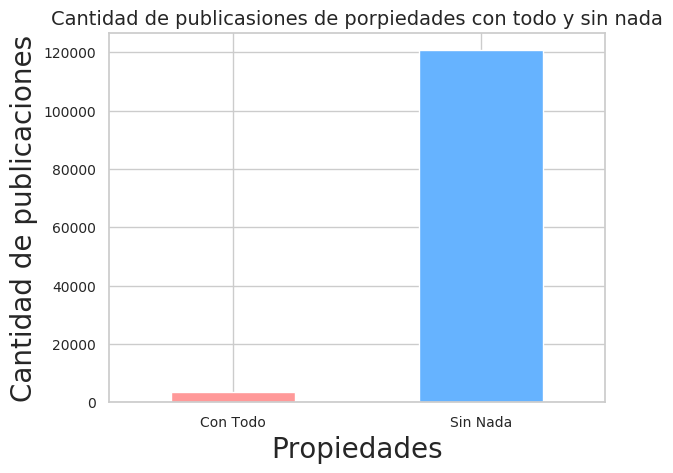

In [137]:
b = Comparacion.plot(kind='bar', fontsize=10, color= ['#ff9999','#66b3ff'], rot=0)#color= plt.cm.Paired(np.arange(len(sTop15))))
b.set_title('Cantidad de publicasiones de porpiedades con todo y sin nada', fontsize=14);
b.set_xlabel('Propiedades', fontsize=20);
b.set_ylabel('Cantidad de publicaciones', fontsize=20);

## Cual es el precio promedio de las propiedades con todo y sin nada

In [138]:
PromPrecioConTodo = PropiedadesConTodo['precio'].mean()
PromPrecioSinNada = PropiedadesSinNada['precio'].mean()
Comparacion = pd.Series([PromPrecioConTodo,PromPrecioSinNada], index= ['Con Todo', 'Sin Nada'])

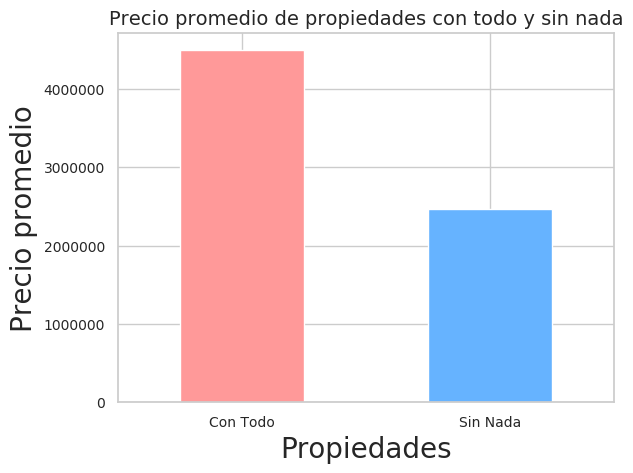

In [142]:
b = Comparacion.plot(kind='bar', fontsize=10, color= ['#ff9999','#66b3ff'], rot=0)#color= plt.cm.Paired(np.arange(len(sTop15))))
b.set_title('Precio promedio de propiedades con todo y sin nada', fontsize=14);
b.set_xlabel('Propiedades', fontsize=20);
b.set_ylabel('Precio promedio', fontsize=20);

# **PRUEBAS (NO ES PARTE DEL RESULTADO FINAL)**

In [140]:
def generadorFormatoPie(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

Text(0, 0.5, '')

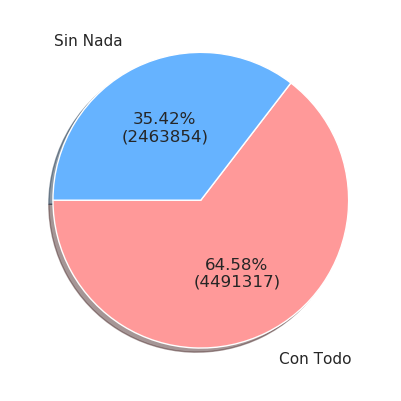

In [141]:
p = Comparacion.plot.pie(autopct=generadorFormatoPie(Comparacion), pctdistance=0.55, labeldistance=1.2,\
                         shadow=True, startangle=180, colors= ['#ff9999','#66b3ff'])
p.set_ylabel('')

In [191]:
blue_palette = ['#009ACD', '#0EBFE9','cyan', '#63D1F4', '#ADD8E6', '#C1F0F6']

In [192]:
sTop6 = PropiedadesSinNada['tipodepropiedad'].value_counts().nlargest(6)

Text(0, 0.5, '')

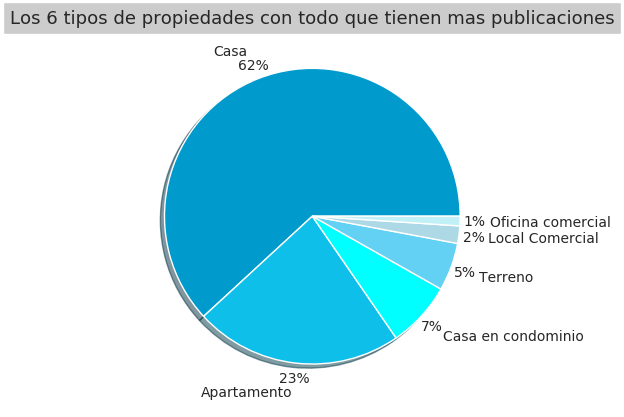

In [201]:
p = sTop6.plot.pie(fontsize=10, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,\
                         shadow=True, startangle=0, colors= blue_palette)
plt.title("Los 6 tipos de propiedades con todo que tienen mas publicaciones", fontsize=13, bbox={'facecolor':'0.8', 'pad':5})
p.set_ylabel('')